<h1>Task 1 - User Overview Analysis</h1>
<hr><hr>

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pwd = os.getcwd()
path = os.path.join(pwd, os.pardir, 'data/data_source.csv')

In [58]:
db = pd.read_csv(path, keep_default_na=True, na_values=['undefined'], parse_dates=['Start', 'End'])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [59]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [60]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [61]:
# information about the columns
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

<h3>Utility Functions</h3>

In [62]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value

        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values

        Returns:
        --------
        A series
    """

    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def percent_missing(df):
    """
        This function takes the dataframe and prints the percentage of
        missing values

        Args:
        -----
        df: dataframe
    """

    # Calculate total number of cells in dataframe
    total_cells = np.product(df.shape)

    # Count number of missing values per column
    missing_count = df.isnull().sum()

    # Calculate total number of missing values
    total_missing = missing_count.sum()

    # Calculate percentage of missing values
    print(round(((total_missing/total_cells) * 100), 2), "%", "missing values.")

def missing_values_table(df):
    """
        This function takes the dataframe and calculate
        missing values by column

        Args:
        -----
        df: dataframe
    """

    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

pd.options.display.float_format = format_float


<h3>Plotting Functions</h3>

In [131]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_strip(df: pd.DataFrame):
    sns.stripplot(y=df)


<h2>Data Cleaning</h2>
<hr>

In [64]:
percent_missing(db)

12.72 % missing values.


In [65]:
missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.80,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.60,float64
Nb of sec with 125000B < Vol DL,97538,65.00,float64
TCP UL Retrans. Vol (Bytes),96649,64.40,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.40,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.90,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.90,float64
TCP DL Retrans. Vol (Bytes),88146,58.80,float64
HTTP UL (Bytes),81810,54.50,float64
HTTP DL (Bytes),81474,54.30,float64


In [66]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [67]:
# remove missing values
db.dropna(subset=['Start'], inplace=True)
db.dropna(subset=['MSISDN/Number'], inplace=True)
db.dropna(subset=['Bearer Id'], inplace=True)

In [68]:
# replace Last Location Name with unknown
db['Last Location Name'] = db['Last Location Name'].fillna(value='unknown')
db['Handset Manufacturer'] = db['Handset Manufacturer'].fillna(value='unknown')
db['Handset Type'] = db['Handset Type'].fillna(value='unknown')

In [69]:
# fill missing cells with column mean
db.fillna(db.mean(numeric_only=True).round(), inplace=True)

In [70]:
db.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [71]:
db.to_csv('../data/clean_data.csv')

<h2>Data Exploration</h2>
<hr>

In [72]:
# top 10 handsets used by the customers
db['Handset Type'].value_counts().nlargest(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
unknown                          8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

In [73]:
# top 3 handset manufacturers
db['Handset Manufacturer'].value_counts().nlargest(3)

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

<BarContainer object of 3 artists>

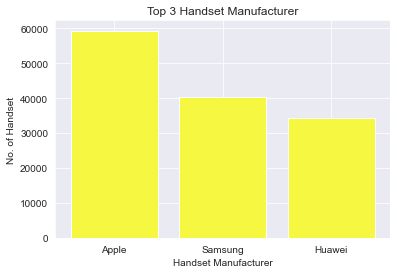

In [74]:
plt.xlabel("Handset Manufacturer")
plt.ylabel("No. of Handset")
plt.title("Top 3 Handset Manufacturer")
plt.bar(list(db['Handset Manufacturer'].value_counts().nlargest(3).keys()),
        list(db['Handset Manufacturer'].value_counts().nlargest(3).values),
        color ='#F6F740',
        )

In [75]:
# top 5 handsets per top 3 handset manufacturer
db['Handset Type'].where(db['Handset Manufacturer'] == 'Apple').value_counts().nlargest(5)

Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: Handset Type, dtype: int64

<BarContainer object of 5 artists>

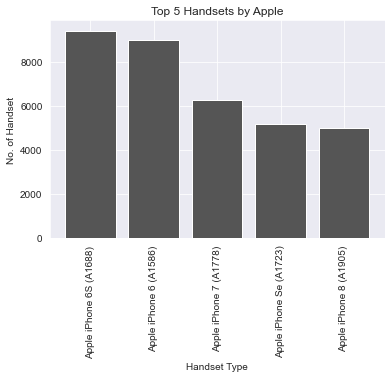

In [76]:
plt.xlabel("Handset Type")
plt.xticks(rotation='vertical')
plt.ylabel("No. of Handset")
plt.title("Top 5 Handsets by Apple")
plt.bar(list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Apple').value_counts().nlargest(5).keys()),
        list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Apple').value_counts().nlargest(5).values),
        color ='#555555',
        )

In [77]:
# top 5 handsets per top 3 handset manufacturer
db['Handset Type'].where(db['Handset Manufacturer'] == 'Samsung').value_counts().nlargest(5)

Samsung Galaxy S8 (Sm-G950F)    4464
Samsung Galaxy A5 Sm-A520F      3700
Samsung Galaxy J5 (Sm-J530)     3675
Samsung Galaxy J3 (Sm-J330)     3456
Samsung Galaxy S7 (Sm-G930X)    3171
Name: Handset Type, dtype: int64

<BarContainer object of 5 artists>

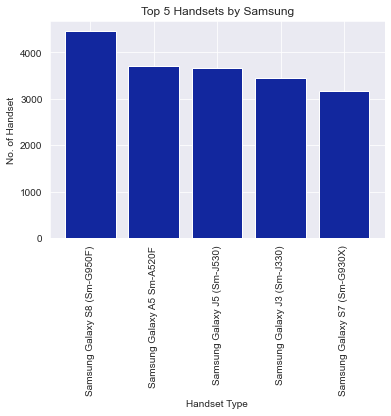

In [78]:
plt.xlabel("Handset Type")
plt.xticks(rotation='vertical')
plt.ylabel("No. of Handset")
plt.title("Top 5 Handsets by Samsung")
plt.bar(list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Samsung').value_counts().nlargest(5).keys()),
        list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Samsung').value_counts().nlargest(5).values),
        color ='#12279e',
        )

In [79]:
# top 5 handsets per top 3 handset manufacturer
db['Handset Type'].where(db['Handset Manufacturer'] == 'Huawei').value_counts().nlargest(5)

Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2012
Huawei P20                         1475
Huawei Y6 2018                      996
Name: Handset Type, dtype: int64

<BarContainer object of 5 artists>

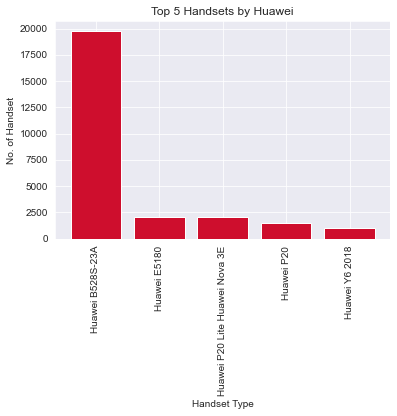

In [80]:
plt.xlabel("Handset Type")
plt.xticks(rotation='vertical')
plt.ylabel("No. of Handset")
plt.title("Top 5 Handsets by Huawei")
plt.bar(list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Huawei').value_counts().nlargest(5).keys()),
        list(db['Handset Type'].where(db['Handset Manufacturer'] == 'Huawei').value_counts().nlargest(5).values),
        color ='#CE0E2D',
        )

In [81]:
user_db = db.groupby('MSISDN/Number').agg({
    "Bearer Id": "count",
    "Dur. (ms)": "sum",
    "Total DL (Bytes)": "sum",
    "Total UL (Bytes)": "sum",
    "Social Media DL (Bytes)": "sum",
    "Social Media UL (Bytes)": "sum",
    "Email DL (Bytes)": "sum",
    "Email UL (Bytes)": "sum",
    "Google DL (Bytes)": "sum",
    "Google UL (Bytes)": "sum",
    "Netflix DL (Bytes)": "sum",
    "Netflix UL (Bytes)": "sum",
    "Youtube DL (Bytes)": "sum",
    "Youtube UL (Bytes)": "sum",
    "Gaming DL (Bytes)": "sum",
    "Gaming UL (Bytes)": "sum",
    "Other DL (Bytes)": "sum",
    "Other UL (Bytes)": "sum",
}).rename(columns={
    "Bearer Id": "Session Count"
})
user_db.head()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","2,206,504.00","25,631.00","837,400.00","493,962.00","3,337,123.00","1,051,882.00","10,265,105.00","16,915,876.00","14,900,201.00","6,724,347.00","811,091,133.00","1,367,528.00","377,096,990.00","9,473,882.00"
"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","2,598,548.00","62,017.00","2,828,821.00","478,960.00","4,197,697.00","1,137,166.00","770,569.00","10,451,194.00","5,324,251.00","7,107,972.00","105,035,298.00","14,714,780.00","279,557,701.00","2,152,370.00"
"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","3,148,004.00","47,619.00","2,436,500.00","768,880.00","3,343,483.00","99,643.00","16,525,919.00","2,827,981.00","2,137,272.00","19,196,298.00","529,068,485.00","9,759,228.00","495,086,501.00","6,607,171.00"
"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","251,469.00","28,825.00","2,178,618.00","106,052.00","5,937,765.00","3,740,728.00","1,157,362.00","784,730.00","4,393,123.00","2,584,198.00","388,074,835.00","3,051,292.00","25,248,001.00","10,031,701.00"
"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","2,861,230.00","51,312.00","2,247,808.00","1,057,661.00","13,728,668.00","4,770,948.00","24,971,647.00","24,230,077.00","10,339,971.00","31,193,031.00","1,308,981,093.00","5,816,727.00","777,643,713.00","27,160,771.00"


In [110]:
user_db["Total Data Transferred (Bytes)"] = user_db["Total UL (Bytes)"] + user_db["Total DL (Bytes)"]
user_db["Google Volume (Bytes)"] = user_db["Google UL (Bytes)"] + user_db["Google DL (Bytes)"]
user_db["Netflix Volume (Bytes)"] = user_db["Netflix UL (Bytes)"] + user_db["Netflix DL (Bytes)"]
user_db["Youtube Volume (Bytes)"] = user_db["Youtube UL (Bytes)"] + user_db["Youtube DL (Bytes)"]
user_db["Gaming Volume (Bytes)"] = user_db["Gaming UL (Bytes)"] + user_db["Gaming DL (Bytes)"]
user_db["Email Volume (Bytes)"] = user_db["Email UL (Bytes)"] + user_db["Email DL (Bytes)"]
user_db["Social Media Volume (Bytes)"] = user_db["Social Media UL (Bytes)"] + user_db["Social Media DL (Bytes)"]
user_db["Other Volume (Bytes)"] = user_db["Other UL (Bytes)"] + user_db["Other DL (Bytes)"]

In [111]:
user_db["Total Volume (Bytes)"] = user_db["Google Volume (Bytes)"] + user_db["Netflix Volume (Bytes)"] + user_db["Youtube Volume (Bytes)"] + user_db["Gaming Volume (Bytes)"] +  user_db["Other Volume (Bytes)"] +  user_db["Social Media Volume (Bytes)"] + user_db["Email Volume (Bytes)"]

In [113]:
user_db.head()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","2,206,504.00","25,631.00","837,400.00","493,962.00","3,337,123.00","1,051,882.00",...,"9,473,882.00","878,690,574.00","4,389,005.00","27,180,981.00","21,624,548.00","812,458,661.00","1,331,362.00","2,232,135.00","386,570,872.00","1,255,787,564.00"
"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","2,598,548.00","62,017.00","2,828,821.00","478,960.00","4,197,697.00","1,137,166.00",...,"2,152,370.00","156,859,643.00","5,334,863.00","11,221,763.00","12,432,223.00","119,750,078.00","3,307,781.00","2,660,565.00","281,710,071.00","436,417,344.00"
"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","3,148,004.00","47,619.00","2,436,500.00","768,880.00","3,343,483.00","99,643.00",...,"6,607,171.00","595,966,483.00","3,443,126.00","19,353,900.00","21,333,570.00","538,827,713.00","3,205,380.00","3,195,623.00","501,693,672.00","1,091,052,984.00"
"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","251,469.00","28,825.00","2,178,618.00","106,052.00","5,937,765.00","3,740,728.00",...,"10,031,701.00","422,320,698.00","9,678,493.00","1,942,092.00","6,977,321.00","391,126,127.00","2,284,670.00","280,294.00","35,279,702.00","447,568,699.00"
"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","2,861,230.00","51,312.00","2,247,808.00","1,057,661.00","13,728,668.00","4,770,948.00",...,"27,160,771.00","1,457,410,944.00","18,499,616.00","49,201,724.00","41,533,002.00","1,314,797,820.00","3,305,469.00","2,912,542.00","804,804,484.00","2,235,054,657.00"


In [114]:
user_db

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00","2,206,504.00","25,631.00","837,400.00","493,962.00","3,337,123.00","1,051,882.00",...,"9,473,882.00","878,690,574.00","4,389,005.00","27,180,981.00","21,624,548.00","812,458,661.00","1,331,362.00","2,232,135.00","386,570,872.00","1,255,787,564.00"
"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00","2,598,548.00","62,017.00","2,828,821.00","478,960.00","4,197,697.00","1,137,166.00",...,"2,152,370.00","156,859,643.00","5,334,863.00","11,221,763.00","12,432,223.00","119,750,078.00","3,307,781.00","2,660,565.00","281,710,071.00","436,417,344.00"
"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00","3,148,004.00","47,619.00","2,436,500.00","768,880.00","3,343,483.00","99,643.00",...,"6,607,171.00","595,966,483.00","3,443,126.00","19,353,900.00","21,333,570.00","538,827,713.00","3,205,380.00","3,195,623.00","501,693,672.00","1,091,052,984.00"
"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00","251,469.00","28,825.00","2,178,618.00","106,052.00","5,937,765.00","3,740,728.00",...,"10,031,701.00","422,320,698.00","9,678,493.00","1,942,092.00","6,977,321.00","391,126,127.00","2,284,670.00","280,294.00","35,279,702.00","447,568,699.00"
"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00","2,861,230.00","51,312.00","2,247,808.00","1,057,661.00","13,728,668.00","4,770,948.00",...,"27,160,771.00","1,457,410,944.00","18,499,616.00","49,201,724.00","41,533,002.00","1,314,797,820.00","3,305,469.00","2,912,542.00","804,804,484.00","2,235,054,657.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"33,789,996,170.00",1,"8,810.00","687,925,212.00","26,716,429.00","234,320.00","65,863.00","480,946.00","525,969.00","6,834,178.00","697,091.00",...,"3,891,534.00","714,641,641.00","7,531,269.00","14,902,538.00","26,647,843.00","660,361,359.00","1,006,915.00","300,183.00","295,282,817.00","1,006,032,924.00"
"33,789,997,247.00",1,"140,988.00","444,575,092.00","35,732,243.00","442,214.00","56,355.00","2,513,433.00",664.00,"1,472,406.00","3,957,299.00",...,"6,479,040.00","480,307,335.00","5,429,705.00","8,531,060.00","19,851,572.00","437,003,292.00","2,514,097.00","498,569.00","211,115,113.00","684,943,408.00"
"3,197,020,876,596.00",1,"877,385.00","194,828,056.00","37,295,915.00","668,596.00","46,628.00","842,279.00","678,492.00","8,572,779.00","1,865,881.00",...,"2,848,373.00","232,123,971.00","10,438,660.00","26,592,300.00","11,959,905.00","178,048,738.00","1,520,771.00","715,224.00","470,526,473.00","699,802,071.00"


In [115]:
user_db_clean = user_db[['Session Count', 'Dur. (ms)', 'Total Data Transferred (Bytes)', 'Social Media Volume (Bytes)', 'Google Volume (Bytes)',  'Email Volume (Bytes)', 'Youtube Volume (Bytes)', 'Netflix Volume (Bytes)', 'Gaming Volume (Bytes)', 'Other Volume (Bytes)']]

In [105]:
user_db_clean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Session Count                   106471 non-null  int64  
 1   Dur. (ms)                       106471 non-null  float64
 2   Total Data Transferred (Bytes)  106471 non-null  float64
 3   Social Media Volume (Bytes)     106471 non-null  float64
 4   Google Volume (Bytes)           106471 non-null  float64
 5   Email Volume (Bytes)            106471 non-null  float64
 6   Youtube Volume (Bytes)          106471 non-null  float64
 7   Netflix Volume (Bytes)          106471 non-null  float64
 8   Gaming Volume (Bytes)           106471 non-null  float64
 9   Other Volume (Bytes)            106471 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.9 MB


In [116]:
user_db_clean

,Session Count,Dur. (ms),Total Data Transferred (Bytes),Social Media Volume (Bytes),Google Volume (Bytes),Email Volume (Bytes),Youtube Volume (Bytes),Netflix Volume (Bytes),Gaming Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,
"33,601,001,722.00",1,"116,720.00","878,690,574.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
"33,601,001,754.00",1,"181,230.00","156,859,643.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
"33,601,002,511.00",1,"134,969.00","595,966,483.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
"33,601,007,832.00",1,"49,878.00","422,320,698.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"
"33,601,008,617.00",2,"37,104.00","1,457,410,944.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00"
...,...,...,...,...,...,...,...,...,...,...
"33,789,996,170.00",1,"8,810.00","714,641,641.00","300,183.00","7,531,269.00","1,006,915.00","26,647,843.00","14,902,538.00","660,361,359.00","295,282,817.00"
"33,789,997,247.00",1,"140,988.00","480,307,335.00","498,569.00","5,429,705.00","2,514,097.00","19,851,572.00","8,531,060.00","437,003,292.00","211,115,113.00"
"3,197,020,876,596.00",1,"877,385.00","232,123,971.00","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00"


In [117]:
user_db_clean.describe()

,Session Count,Dur. (ms),Total Data Transferred (Bytes),Social Media Volume (Bytes),Google Volume (Bytes),Email Volume (Bytes),Youtube Volume (Bytes),Netflix Volume (Bytes),Gaming Volume (Bytes),Other Volume (Bytes)
count,"106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00"
mean,1.39,"146,571.49","691,519,853.42","2,549,791.01","10,890,704.39","3,151,120.96","31,581,722.91","31,563,183.13","600,258,518.58","598,949,256.85"
std,0.81,"186,562.67","491,526,652.87","1,909,684.87","7,552,384.40","2,224,562.52","21,315,507.21","21,309,392.94","449,561,110.91","449,288,975.90"
min,1.00,"7,142.00","33,249,009.00","1,563.00","40,330.00","18,176.00","78,903.00","184,569.00","306,358.00","149,045.00"
25%,1.00,"72,399.50","358,765,225.00","1,211,936.00","5,945,631.50","1,675,398.00","18,636,632.50","18,570,109.00","288,249,263.00","285,874,681.00"
50%,1.00,"103,137.00","618,326,893.00","2,305,229.00","9,592,577.00","2,801,129.00","26,816,330.00","26,731,157.00","542,677,264.00","540,109,665.00"
75%,2.00,"172,799.00","857,873,157.50","3,309,043.00","13,223,179.50","3,848,998.00","37,956,655.00","38,002,332.00","777,704,466.50","775,646,602.50"
max,18.00,"18,553,754.00","8,846,226,494.00","43,374,779.00","152,191,852.00","42,418,782.00","452,958,769.00","399,519,079.00","7,749,432,234.00","8,167,877,776.00"


In [118]:
df_exp = user_db_clean.copy()

In [119]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Session Count                   106471 non-null  int64  
 1   Dur. (ms)                       106471 non-null  float64
 2   Total Data Transferred (Bytes)  106471 non-null  float64
 3   Social Media Volume (Bytes)     106471 non-null  float64
 4   Google Volume (Bytes)           106471 non-null  float64
 5   Email Volume (Bytes)            106471 non-null  float64
 6   Youtube Volume (Bytes)          106471 non-null  float64
 7   Netflix Volume (Bytes)          106471 non-null  float64
 8   Gaming Volume (Bytes)           106471 non-null  float64
 9   Other Volume (Bytes)            106471 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.9 MB


In [241]:
df_exp.dtypes

Session Count                       int64
Dur. (ms)                         float64
Total Data Transferred (Bytes)    float64
Social Media Volume (Bytes)       float64
Google Volume (Bytes)             float64
Email Volume (Bytes)              float64
Youtube Volume (Bytes)            float64
Netflix Volume (Bytes)            float64
Gaming Volume (Bytes)             float64
Other Volume (Bytes)              float64
DecileRank                          int64
dtype: object

In [120]:
df_exp.head()

,Session Count,Dur. (ms),Total Data Transferred (Bytes),Social Media Volume (Bytes),Google Volume (Bytes),Email Volume (Bytes),Youtube Volume (Bytes),Netflix Volume (Bytes),Gaming Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,
"33,601,001,722.00",1,"116,720.00","878,690,574.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
"33,601,001,754.00",1,"181,230.00","156,859,643.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
"33,601,002,511.00",1,"134,969.00","595,966,483.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
"33,601,007,832.00",1,"49,878.00","422,320,698.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"
"33,601,008,617.00",2,"37,104.00","1,457,410,944.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00"


<h4>Univariate Analysis</h4>

<h5>Non-Graphical Univariate Analysis</h5>

In [121]:
df_exp['Session Count'].describe()

count   106,471.00
mean          1.39
std           0.81
min           1.00
25%           1.00
50%           1.00
75%           2.00
max          18.00
Name: Session Count, dtype: float64

In [208]:
user_db_clean['Dur. (ms)'].describe()

count      106,471.00
mean       146,571.49
std        186,562.67
min          7,142.00
25%         72,399.50
50%        103,137.00
75%        172,799.00
max     18,553,754.00
Name: Dur. (ms), dtype: float64

In [209]:
user_db_clean['Total Data Transferred (Bytes)'].describe()

count         106,471.00
mean      691,519,853.42
std       491,526,652.87
min        33,249,009.00
25%       358,765,225.00
50%       618,326,893.00
75%       857,873,157.50
max     8,846,226,494.00
Name: Total Data Transferred (Bytes), dtype: float64

In [211]:
user_db_clean['Social Media Volume (Bytes)'].describe()

count      106,471.00
mean     2,549,791.01
std      1,909,684.87
min          1,563.00
25%      1,211,936.00
50%      2,305,229.00
75%      3,309,043.00
max     43,374,779.00
Name: Social Media Volume (Bytes), dtype: float64

In [192]:
user_db_clean['Google Volume (Bytes)'].describe()

count       106,471.00
mean     10,890,704.39
std       7,552,384.40
min          40,330.00
25%       5,945,631.50
50%       9,592,577.00
75%      13,223,179.50
max     152,191,852.00
Name: Google Volume (Bytes), dtype: float64

In [221]:
user_db_clean['Email Volume (Bytes)'].describe()

count      106,471.00
mean     3,151,120.96
std      2,224,562.52
min         18,176.00
25%      1,675,398.00
50%      2,801,129.00
75%      3,848,998.00
max     42,418,782.00
Name: Email Volume (Bytes), dtype: float64

In [194]:
user_db_clean['Youtube Volume (Bytes)'].describe()

count       106,471.00
mean     31,581,722.91
std      21,315,507.21
min          78,903.00
25%      18,636,632.50
50%      26,816,330.00
75%      37,956,655.00
max     452,958,769.00
Name: Youtube Volume (Bytes), dtype: float64

In [223]:
user_db_clean['Netflix Volume (Bytes)'].describe()

count       106,471.00
mean     31,563,183.13
std      21,309,392.94
min         184,569.00
25%      18,570,109.00
50%      26,731,157.00
75%      38,002,332.00
max     399,519,079.00
Name: Netflix Volume (Bytes), dtype: float64

In [226]:
user_db_clean['Gaming Volume (Bytes)'].describe()

count         106,471.00
mean      600,258,518.58
std       449,561,110.91
min           306,358.00
25%       288,249,263.00
50%       542,677,264.00
75%       777,704,466.50
max     7,749,432,234.00
Name: Gaming Volume (Bytes), dtype: float64

In [197]:
user_db_clean['Other Volume (Bytes)'].describe()

count         106,471.00
mean      598,949,256.85
std       449,288,975.90
min           149,045.00
25%       285,874,681.00
50%       540,109,665.00
75%       775,646,602.50
max     8,167,877,776.00
Name: Other Volume (Bytes), dtype: float64

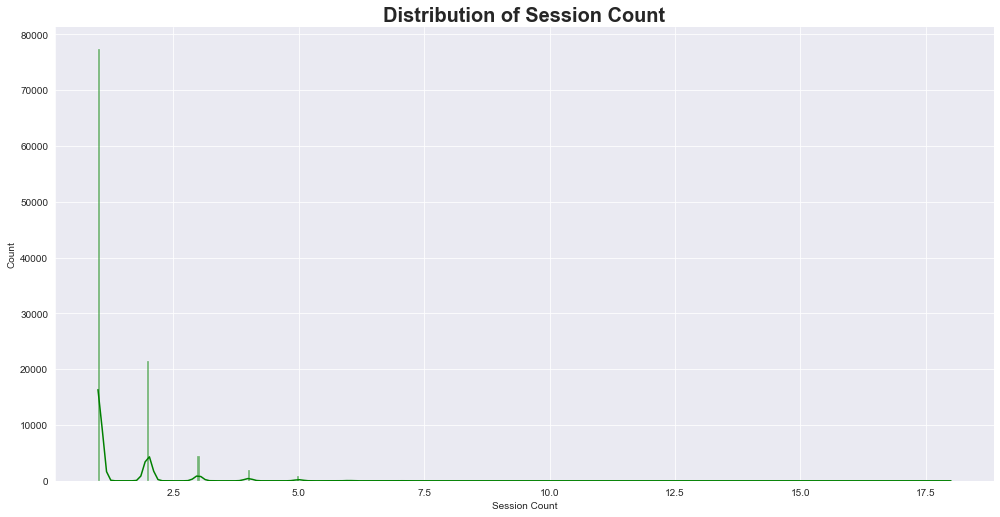

In [100]:
plot_hist(df_exp, "Session Count", "green")

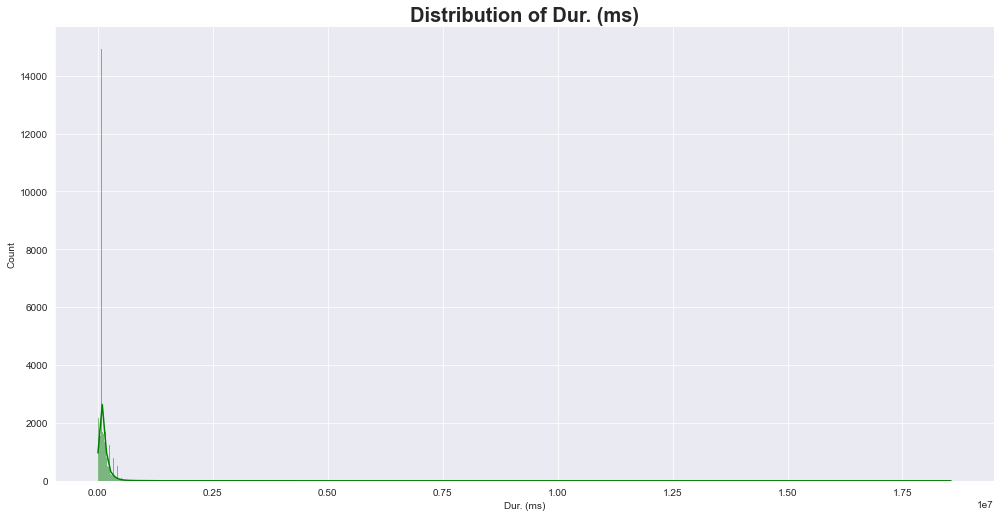

In [229]:
plot_hist(df_exp, "Dur. (ms)", "green")

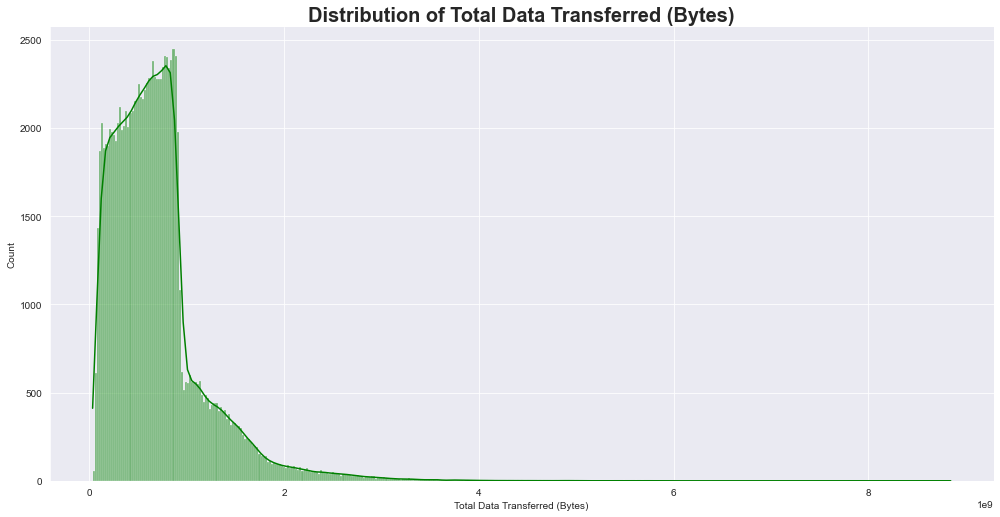

In [230]:
plot_hist(df_exp, "Total Data Transferred (Bytes)", "green")

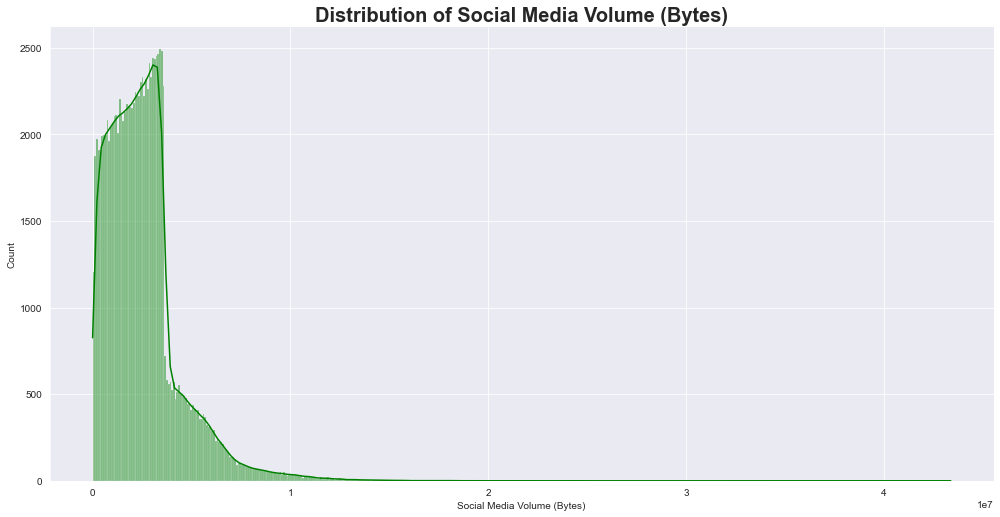

In [231]:
plot_hist(df_exp, "Social Media Volume (Bytes)", "green")

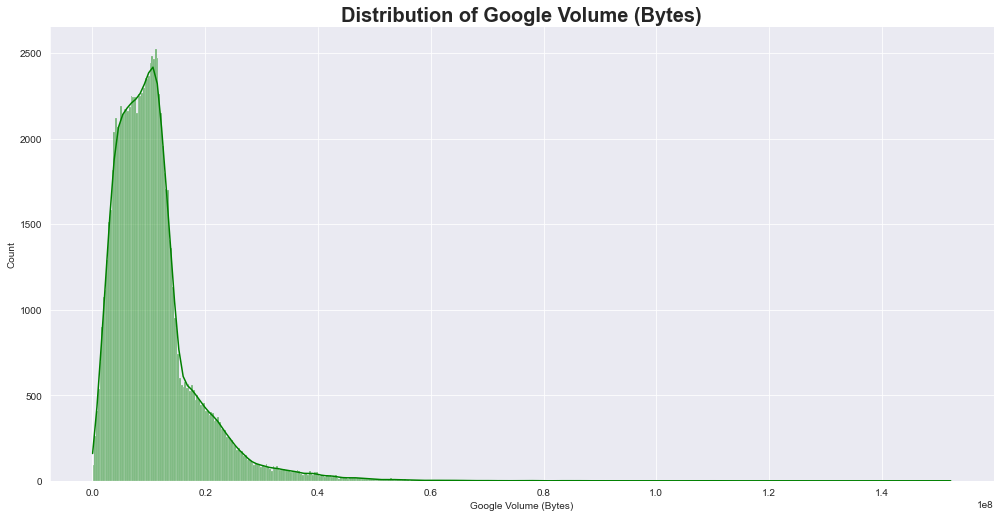

In [232]:
plot_hist(df_exp, "Google Volume (Bytes)", "green")

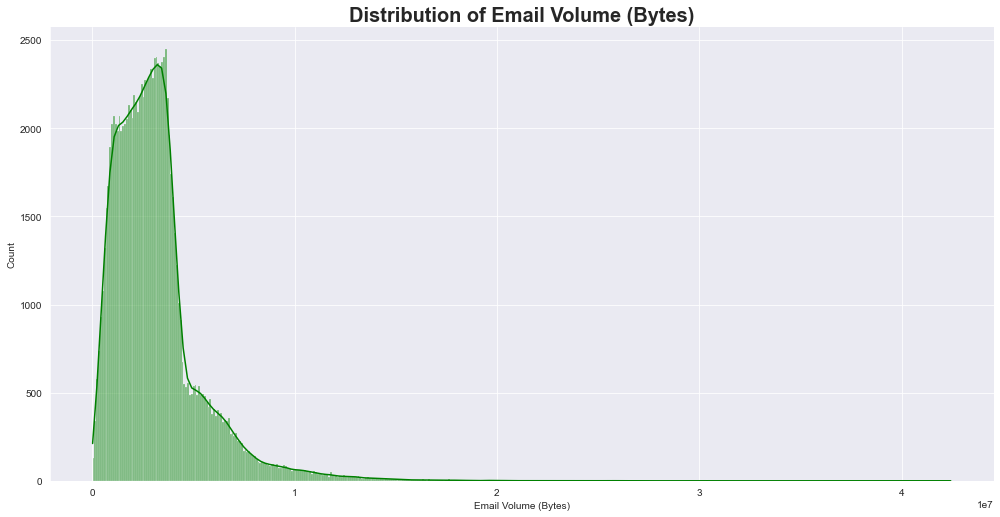

In [233]:
plot_hist(df_exp, "Email Volume (Bytes)", "green")

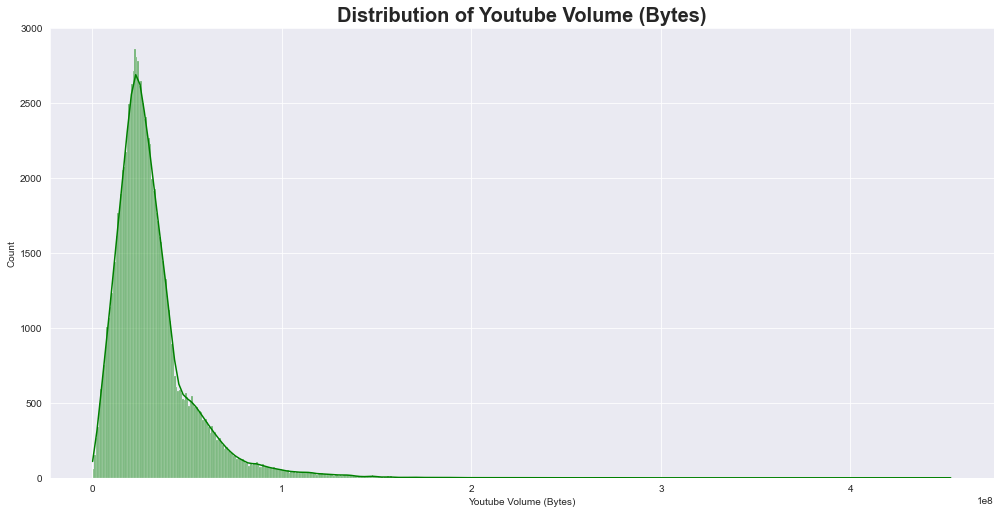

In [234]:
plot_hist(df_exp, "Youtube Volume (Bytes)", "green")

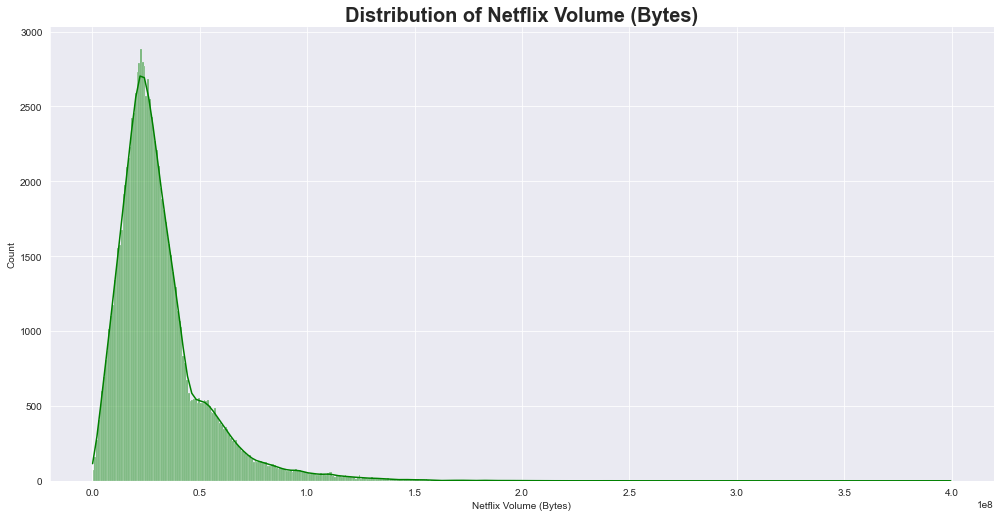

In [235]:
plot_hist(df_exp, "Netflix Volume (Bytes)", "green")

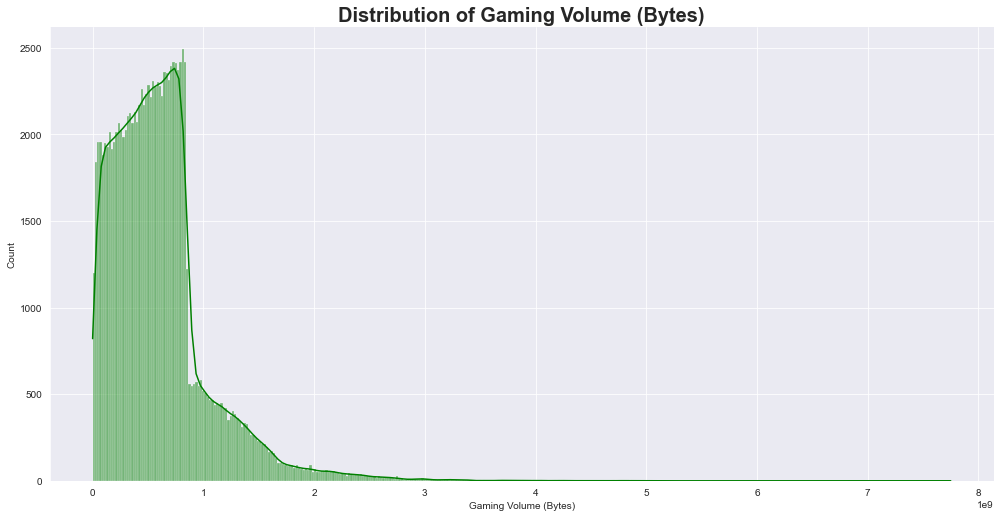

In [236]:
plot_hist(df_exp, "Gaming Volume (Bytes)", "green")

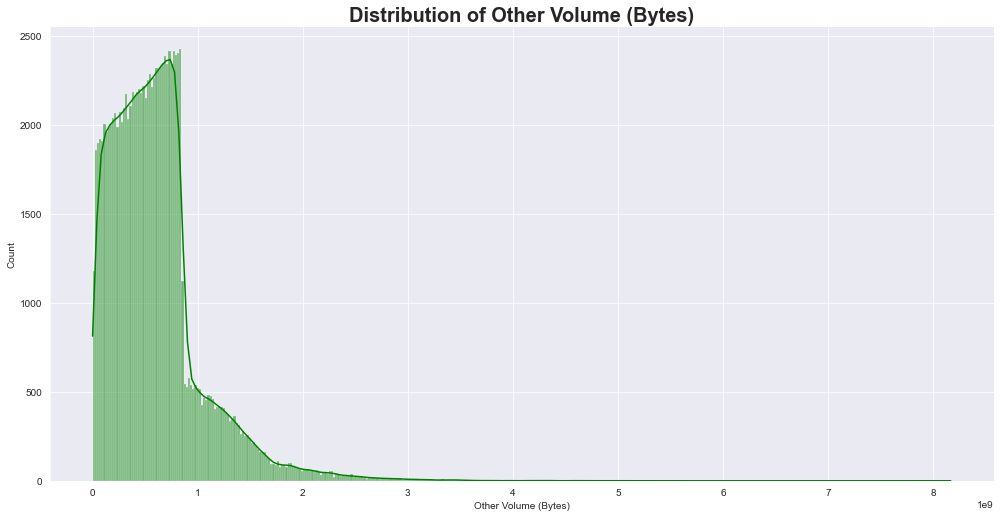

In [237]:
plot_hist(df_exp, "Other Volume (Bytes)", "green")

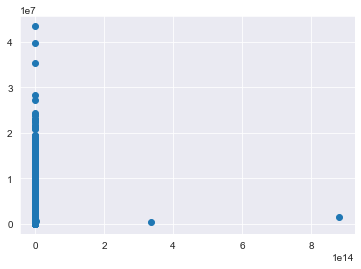

In [239]:
plt.scatter(df_exp.index, df_exp['Social Media Volume (Bytes)'])

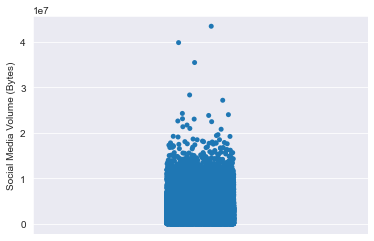

In [240]:
plot_strip(df_exp['Social Media Volume (Bytes)'])

KeyboardInterrupt: 

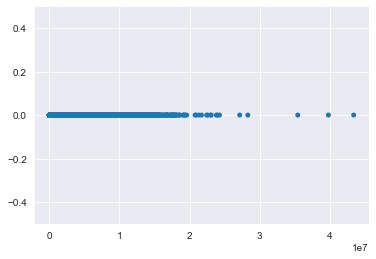

In [151]:
sns.swarmplot(x=df_exp['Social Media Volume (Bytes)'])

<h5>Graphical Univariate Analysis</h5>
<h3>Outliers</h3>

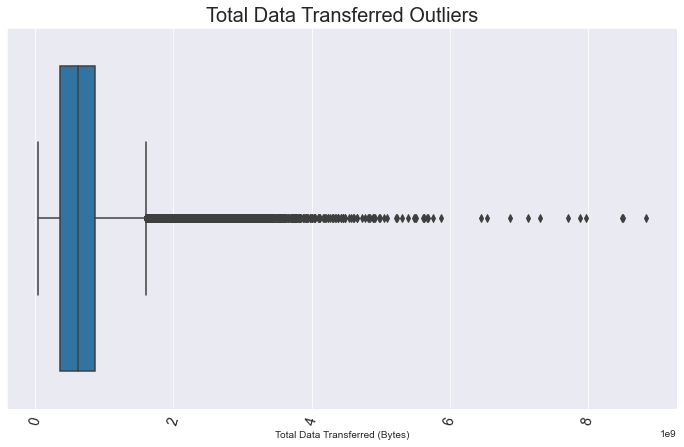

In [149]:
plot_box(df_exp, 'Total Data Transferred (Bytes)', 'Total Data Transferred Outliers')

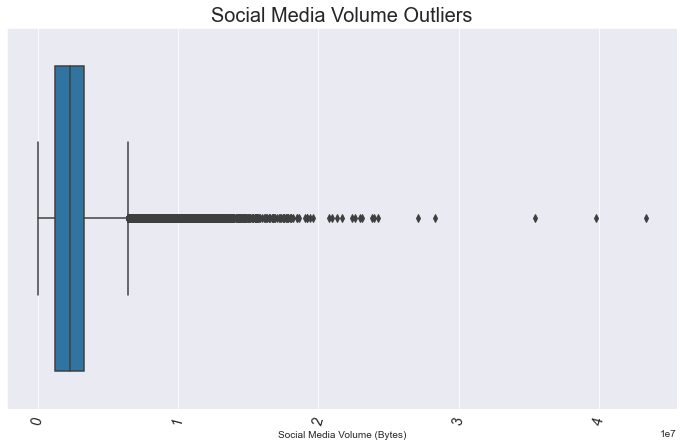

In [150]:
plot_box(df_exp, 'Social Media Volume (Bytes)', 'Social Media Volume Outliers')

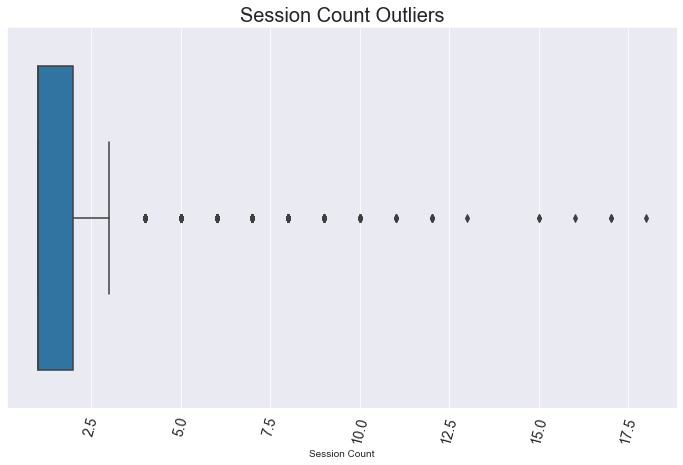

In [185]:
plot_box(df_exp, 'Session Count', 'Session Count Outliers')

<h4>Multivariate Analysis</h4>

In [155]:
df_exp['Social Media Volume (Bytes)']

MSISDN/Number
33,601,001,722.00        2,232,135.00
33,601,001,754.00        2,660,565.00
33,601,002,511.00        3,195,623.00
33,601,007,832.00          280,294.00
33,601,008,617.00        2,912,542.00
                             ...     
33,789,996,170.00          300,183.00
33,789,997,247.00          498,569.00
3,197,020,876,596.00       715,224.00
337,000,037,000,919.00     521,566.00
882,397,108,489,451.00   1,546,088.00
Name: Social Media Volume (Bytes), Length: 106471, dtype: float64

<AxesSubplot:ylabel='None'>

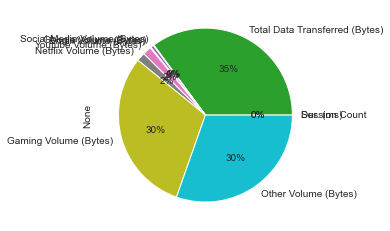

In [168]:
df_exp.sum().plot(
    kind='pie', y='', autopct='%1.0f%%')

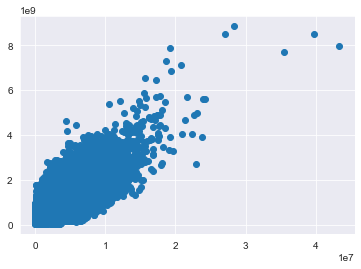

In [244]:
plt.scatter(df_exp['Social Media Volume (Bytes)'], df_exp['Total Data Transferred (Bytes)'])

<h4>Variable transformations</h4>

In [178]:
# sorting the dataFrame in ascending order of total duration for all sessions
df_exp.sort_values(by =['Dur. (ms)'], inplace = True)

In [179]:
df_exp['DecileRank']= pd.qcut(df_exp['Dur. (ms)'],
                           q = 10, labels = False)

In [201]:
df_exp.head()

,Session Count,Dur. (ms),Total Data Transferred (Bytes),Social Media Volume (Bytes),Google Volume (Bytes),Email Volume (Bytes),Youtube Volume (Bytes),Netflix Volume (Bytes),Gaming Volume (Bytes),Other Volume (Bytes),DecileRank
MSISDN/Number,,,,,,,,,,,
"33,763,505,878.00",1,"7,142.00","558,334,893.00","1,065,060.00","8,933,196.00","2,264,693.00","15,264,002.00","7,859,901.00","517,329,331.00","33,455,346.00",0
"33,665,660,120.00",1,"7,146.00","678,517,390.00","1,163,449.00","4,680,503.00","1,075,475.00","19,778,800.00","31,358,730.00","619,324,450.00","375,530,262.00",0
"33,659,328,207.00",1,"7,189.00","279,804,529.00","3,431,790.00","5,458,634.00","1,028,980.00","22,378,059.00","32,348,712.00","203,674,294.00","783,669,544.00",0
"33,698,390,293.00",1,"7,258.00","836,659,601.00","2,492,057.00","10,015,999.00","1,629,885.00","35,149,499.00","13,639,254.00","767,565,928.00","228,133,871.00",0
"33,650,431,620.00",1,"7,267.00","208,893,702.00","1,241,948.00","7,137,699.00","1,060,753.00","28,815,782.00","16,277,371.00","143,313,134.00","658,731,686.00",0


<h4>Correlation Analysis</h4>

In [183]:
df_exp[['Social Media Volume (Bytes)', 'Google Volume (Bytes)', 'Email Volume (Bytes)', 'Youtube Volume (Bytes)', 'Netflix Volume (Bytes)', 'Gaming Volume (Bytes)', 'Other Volume (Bytes)']].corr()

,Social Media Volume (Bytes),Google Volume (Bytes),Email Volume (Bytes),Youtube Volume (Bytes),Netflix Volume (Bytes),Gaming Volume (Bytes),Other Volume (Bytes)
Social Media Volume (Bytes),1.00,0.64,0.63,0.66,0.66,0.59,0.59
Google Volume (Bytes),0.64,1.00,0.69,0.72,0.72,0.64,0.64
Email Volume (Bytes),0.63,0.69,1.00,0.71,0.71,0.63,0.63
Youtube Volume (Bytes),0.66,0.72,0.71,1.00,0.74,0.66,0.66
Netflix Volume (Bytes),0.66,0.72,0.71,0.74,1.00,0.66,0.66
Gaming Volume (Bytes),0.59,0.64,0.63,0.66,0.66,1.00,0.59
Other Volume (Bytes),0.59,0.64,0.63,0.66,0.66,0.59,1.00


<h4>Dimensionality Reduction</h4>

In [202]:
from sklearn.decomposition import PCA

In [204]:
pca = PCA(n_components=5)
pca.fit(df_exp)

PCA(n_components=5)

In [207]:
pca.components_

array([[ 9.36726583e-10,  1.37935605e-04,  6.53158524e-01,
         1.70904206e-03,  7.36310474e-03,  2.11868866e-03,
         2.13877689e-02,  2.13422744e-02,  5.91460916e-01,
         4.71787403e-01,  1.60701081e-09],
       [ 4.34301823e-10,  6.13629388e-05, -3.20864392e-01,
         7.88599336e-04,  3.33459678e-03,  9.92132911e-04,
         9.60336454e-03,  9.24278741e-03, -3.48722331e-01,
         8.80481911e-01,  7.55660577e-10],
       [ 1.18025369e-08,  1.74576721e-03,  5.34562117e-01,
         2.24954881e-02,  1.06642786e-01,  2.81513007e-02,
         4.20969821e-01,  4.23874299e-01, -5.85254628e-01,
        -4.64873878e-02,  1.98428000e-08],
       [ 1.00451054e-11, -2.59151056e-04, -9.50699928e-04,
         2.07609189e-04, -2.35356480e-03,  3.56187279e-04,
        -7.07992152e-01,  7.06214882e-01,  9.26716227e-04,
         3.37520374e-04, -1.08382543e-09],
       [ 1.68103634e-08,  2.58508375e-03,  2.26817341e-01,
         4.55525802e-02,  7.54656122e-01,  5.59072890e-02,
  